# ALGORITMO GENÉTICO PARA OTIMIZAR SATISFAÇÃO EM DORMITÓRIO

### TODOS OS DADOS SÃO FICTÍCIOS. O OBJETIVO É APENAS MOSTRAR A APLICABILIDADE DOS ALGORITMOS GENÉTICOS.

O objetivo é otimizar a organização dos móveis em cada quarto para assim aumentar a satisfação dos estudantes. Todos os quartos terão os mesmos móveis, ou seja, o melhor cromossomo será a solução para todos os quartos. 

Cada quarto deve ter, no mínimo, uma cama e uma mesa de estudo. Além disso, a quantidade de luzes adicionais não pode passar de 4 e a quantidade de cadeiras deve ser sempre igual à quantidade de camas.

Dados do Problema:

Dormitórios:
    Número de quartos (N): 10
    Área de cada quarto (A_i): 20 metros quadrados
    
Recursos Disponíveis:

    Camas:
        Ocupa: 3 metros quadrados
        Custo: R$ 500
        Satisfação: 10 pontos por cama

    Mesas de estudo:
        Ocupa: 2 metros quadrados
        Custo: R$ 300
        Satisfação: 8 pontos por mesa

    Armários:
        Ocupa: 1.5 metros quadrados
        Custo: R$ 200
        Satisfação: 6 pontos por armário

    Cadeiras:
        Ocupa: 1 metro quadrado
        Custo: R$ 100
        Satisfação: 4 pontos por cadeira

    Luzes adicionais:
        Ocupa: 0 metros quadrados (desprezível)
        Custo: R$ 50 por unidade
        Satisfação: 3 pontos por unidade
        Limite: 4 por quarto

Orçamento Total:

    R$ 50.000

In [311]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np

Gera indivíduo

In [312]:
def cromossomo(tamanho_crom):
    cromossomo = []
    for i in range(tamanho_crom):
        if random.random() < 0.5:
            cromossomo.append("0")
        else:
            cromossomo.append("1")
        
    return cromossomo

In [313]:
print(cromossomo(16))

['0', '1', '1', '0', '1', '1', '0', '1', '0', '1', '1', '1', '1', '1', '0', '1']


Gera população

In [314]:
def gerar_populacao(tamanho_pop, tamanho_crom):
    populacao = []

    for i in range(tamanho_pop):
        crom = cromossomo(tamanho_crom)
        populacao.append(crom)

    return populacao

In [315]:
gerar_populacao(10, 15)

[['0', '1', '0', '0', '0', '0', '0', '1', '1', '0', '1', '1', '0', '1', '1'],
 ['1', '1', '0', '0', '1', '0', '1', '1', '0', '0', '1', '1', '1', '0', '1'],
 ['1', '1', '0', '1', '0', '1', '0', '1', '0', '0', '1', '0', '0', '0', '0'],
 ['1', '1', '1', '1', '0', '1', '0', '0', '0', '0', '1', '0', '1', '1', '1'],
 ['0', '1', '1', '0', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '0'],
 ['1', '1', '0', '0', '1', '0', '0', '1', '0', '0', '1', '1', '0', '1', '1'],
 ['0', '0', '0', '0', '1', '1', '1', '1', '0', '0', '1', '0', '0', '0', '1'],
 ['0', '1', '0', '1', '1', '0', '0', '1', '0', '1', '0', '1', '0', '1', '0'],
 ['1', '1', '0', '1', '0', '0', '1', '1', '1', '0', '1', '1', '1', '0', '1'],
 ['1', '1', '0', '0', '0', '1', '1', '1', '0', '0', '1', '0', '0', '1', '1']]

Divide o cromossomo

In [316]:
def variaveis(cromossomo, tam_subgrupo): # Quebra o cromossomo em subgrupos do tamanho de tam_subgrupo
    subgrupos = []
    valor = []
    for i in range(1, len(cromossomo)+1):
        valor.append(cromossomo[i-1]) 
        if i % tam_subgrupo == 0:
            subgrupos.append(valor)
            valor = []

    return subgrupos



In [317]:
variaveis(cromossomo(15), 3)

[['1', '1', '0'],
 ['0', '0', '0'],
 ['0', '0', '0'],
 ['1', '1', '0'],
 ['0', '1', '1']]

Convertendo a variável para decimal

In [318]:
def converte_para_decimal(variaveis):
    convertidos = []

    for i in variaveis:
        variavel_concatenada = ''.join(i)
        convertidos.append(int(variavel_concatenada, 2))

    return np.array(convertidos)


In [319]:
c = cromossomo(15)
print(c)
converte_para_decimal(variaveis(c, 3))

['1', '1', '0', '1', '0', '0', '0', '1', '1', '0', '0', '1', '1', '1', '1']


array([6, 4, 3, 1, 7])

Fitness

In [321]:
def fitness(crom):
    satisfacao = 0
    espaco_ocupado = 3*crom[0] + 2*crom[1] + 1.5*crom[2] + 1*crom[3]
    custo_total = (500*crom[0] + 300*crom[1] + 200*crom[2] + 100*crom[3] + 50*crom[4])*10
    
    if (espaco_ocupado > 20 or custo_total > 50000 or 
        crom[0] < 1 or crom[1] < 1 or crom[0] != crom[3] or crom[4] > 4):
        # Penalização proporcional ao excesso
        satisfacao = 0.1
    else:
        satisfacao = 10*crom[0] + 8*crom[1] + 6*crom[2] + 4*crom[3] + 3*crom[4]
    
    return satisfacao


In [322]:
c = cromossomo(15)
print(c)
subgrupos = variaveis(c, 3)
convertidos = converte_para_decimal(subgrupos)
fitness(convertidos)

['1', '1', '1', '1', '1', '0', '0', '1', '0', '0', '1', '0', '1', '0', '1']


0.1

Seleciona o melhor indivíduo

In [323]:
def seleciona_melhor(populacao, tam_subgrupo):
    melhor_cromosomo = populacao[0]
    subgrupos = variaveis(melhor_cromosomo, tam_subgrupo)
    maior_valor = fitness(converte_para_decimal(subgrupos))
    for i in range(1, len(populacao)):
        subgrupos = variaveis(populacao[i], tam_subgrupo)
        valor_atual = fitness(converte_para_decimal(subgrupos))
        if maior_valor < valor_atual:
            melhor_cromosomo = populacao[i]
            maior_valor = valor_atual

    return maior_valor, melhor_cromosomo

In [324]:
seleciona_melhor(gerar_populacao(10, 15), 3)

(0.1,
 ['1', '0', '1', '1', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0'])

Selecionando os n melhores que irão passar para a próxima geração

In [325]:
# Selecionando os n melhores indivíduos que quero que continuem na próxima geração

def elitismo(populacao, nMelhores, tam_subgrupo):
    avaliados = [(fitness(converte_para_decimal(variaveis(cromossomo, tam_subgrupo))), cromossomo) for cromossomo in populacao]
    ordenados = sorted(avaliados, reverse=True)
    escolhidos = [cromossomo for _, cromossomo in ordenados[:nMelhores]]

    return escolhidos

Seleção dos pais pela roleta viciada

In [326]:
def soma_avaliacoes(populacao, tam_subgrupo):
    soma_avalicao = 0
    for individuo in populacao:
        subgrupos = variaveis(individuo, tam_subgrupo)
        soma_avalicao += fitness(converte_para_decimal(subgrupos)) # Realizando soma direta
    return soma_avalicao


def seleciona_pai(soma_avaliacao, populacao, tam_subgrupo):
    pai = -1 # nao selecionou nenhum individuo ainda
    valor_sorteado = random.random() * soma_avaliacao # Simula a roleta sendo girada
    soma = 0
    i = 0
    
    while i < len(populacao) and soma < valor_sorteado:
        subgrupos = variaveis(populacao[i], tam_subgrupo)
        soma += fitness(converte_para_decimal(subgrupos))
        pai += 1
        i += 1
    return pai
    

Crossover

In [327]:
def crossover(pai1, pai2):
    ponto_crossover = random.randint(0, len(pai1) - 1)  # Escolhe um ponto de crossover
    filho = pai2[0:ponto_crossover] + pai1[ponto_crossover:]

    return filho


Mutação

In [328]:
def mutacao(cromossomo, taxa_mutacao):
    for i in range(len(cromossomo)):
        if random.random() < taxa_mutacao:
            if cromossomo[i] == '1':
                cromossomo[i] = '0'
            else:
                cromossomo[i] = '1'

    return cromossomo

Restaurando o tamanho da população

In [329]:
def nova_populacao(populacao, taxa_mutacao, nMelhores, soma_avalicao, tam_subgrupo):
    # O elitismo é aplicado para selecionar o melhor indivíduo e gerar n clones dele
    # O crossover é aplicado selecionando indivíduos entre toda a populaçao atual
    nova_populacao = elitismo(populacao, nMelhores, tam_subgrupo)

    while len(nova_populacao) < len(populacao):
        pai1 = seleciona_pai(soma_avalicao, populacao, tam_subgrupo)
        pai2 = seleciona_pai(soma_avalicao, populacao, tam_subgrupo)
        novo_cromo = crossover(populacao[pai1], populacao[pai2])
        nova_populacao.append(mutacao(novo_cromo, taxa_mutacao))

    return nova_populacao

### EXECUÇÃO DO ALGORITMO

In [330]:
def alg_genetico(geracoes, tamanho_pop, tamanho_crom, taxa_mutacao, tam_subgrupo):
    melhores = []
    nova_pop = []
    pop = gerar_populacao(tamanho_pop,tamanho_crom) # Criando cromossomos
    melhores.append(seleciona_melhor(pop, tam_subgrupo))
    
    for i in range(geracoes):
        soma_avaliacao = soma_avaliacoes(pop, tam_subgrupo)
        nova_pop = nova_populacao(pop, taxa_mutacao, round(tamanho_pop*0.15), soma_avaliacao, tam_subgrupo)
        melhores.append(seleciona_melhor(nova_pop, tam_subgrupo))
        pop = nova_pop
    
    return melhores

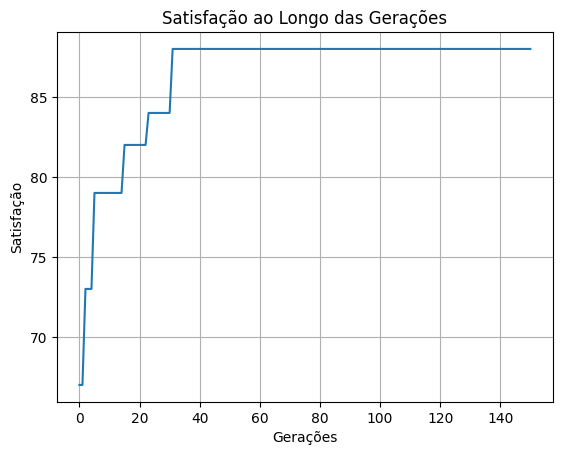

In [333]:
# Execução do algoritmo
melhores = alg_genetico(150, 40, 15, 0.1, 3)

# Extração dos valores de lucro dos melhores cromossomos
satis = [satis for satis, cromossomo in melhores]

# Criação do gráfico de linhas
plt.plot(satis)
plt.title('Satisfação ao Longo das Gerações')
plt.xlabel('Gerações')
plt.ylabel('Satisfação')
plt.grid(True)
plt.show()

In [332]:
maximo = max(melhores)
max_funcao = maximo[0]
print(max_funcao)
max_crom = maximo[1]
print(max_crom)
max_convertido = converte_para_decimal(variaveis(max_crom, 3))
print(max_convertido)
espaco_ocupado = 3*max_convertido[0] + 2*max_convertido[1] + 1.5*max_convertido[2] + max_convertido[3]
custo_total = 500*max_convertido[0] + 300*max_convertido[1] + 200*max_convertido[2] + 100*max_convertido[3] + 50*max_convertido[4]
print(espaco_ocupado, custo_total)


90
['0', '0', '1', '1', '0', '1', '1', '0', '0', '0', '0', '1', '1', '0', '0']
[1 5 4 1 4]
20.0 3100
